In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Bandit:
    def __init__(self, p, learning_rate='decay', initial_estimate=0):
        self.p = p
        self.p_estimate = initial_estimate
        self.N = 0
        self.learning_rate = learning_rate


    def pull(self):
        return np.random.random() < self.p

    def update(self, x):
        self.N += 1
        if self.learning_rate == 'decay':
            self.p_estimate = self.p_estimate + (1/self.N) * (x - self.p_estimate)
        else:
            self.p_estimate = self.p_estimate + self.learning_rate * (x - self.p_estimate)

In [17]:
# the probability of the reward in each bandit
Bandit_prob = [0.2, 0.5, 0.75, 0.6, 0.85, 0.2, 0.3, 0.4, 0.5, 0.6]

In [18]:
def experiment(n_iter, Eps=0, initial_estimate=0):
    """Evaluate the bandit over a number of trials."""
    bandits = [Bandit(p, initial_estimate=initial_estimate) for p in Bandit_prob]
    rewards = np.zeros(n_iter)
    for i in range(n_iter):
        if np.random.random() < Eps:
            j = np.random.randint(len(Bandit_prob))
        else:
            j = np.argmax( [ b.p_estimate  for b in bandits])

        x = bandits[j].pull()
        bandits[j].update(x)
        rewards[i] = x

    cumulative_average = np.cumsum(rewards) / (np.arange(n_iter) + 1)
    return cumulative_average

# Evaluation

### Use variety of Epsilon

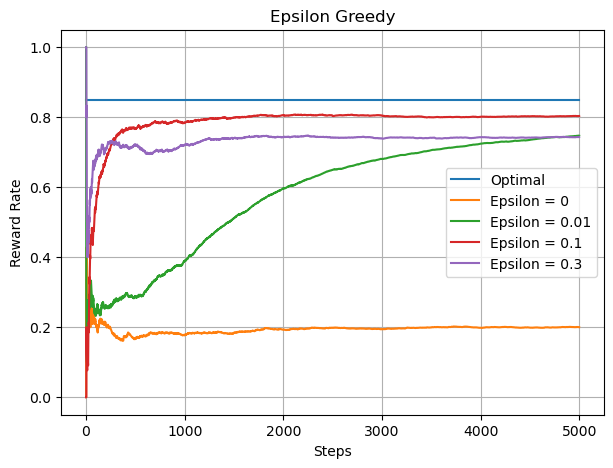

In [19]:
Eps = [0, 0.01, 0.1, 0.3] # Epsilon values
n_iter = 5000 # Number of iterations
plt.figure(figsize=(7, 5))
plt.plot([0, n_iter], [max(Bandit_prob), max(Bandit_prob)], label='Optimal')
for eps in Eps:
    reward_rate = experiment(n_iter, eps)
    plt.plot(reward_rate, label='Epsilon = ' + str(eps))
    plt.xlabel('Steps')
    plt.ylabel('Reward Rate')
    plt.title('Epsilon Greedy')
    plt.grid(True)
    plt.legend()

### Optimistic VS greedy

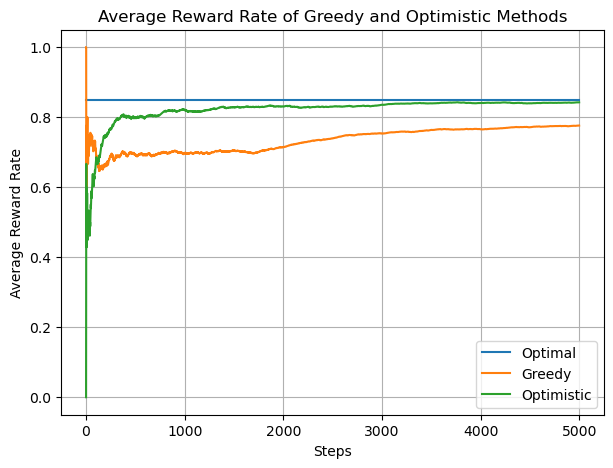

In [20]:
n_iter = 5000
reward_rate_greedy = experiment(n_iter=n_iter, Eps=0.1)
reward_rate_optimistic = experiment(n_iter=n_iter, initial_estimate=5)

plt.figure(figsize=(7, 5))
plt.plot([0, n_iter], [max(Bandit_prob), max(Bandit_prob)], label='Optimal')
plt.plot(reward_rate_greedy, label='Greedy')
plt.plot(reward_rate_optimistic, label='Optimistic')
plt.xlabel('Steps')
plt.ylabel('Average Reward Rate')
plt.title('Average Reward Rate of Greedy and Optimistic Methods')
plt.grid(True)
plt.legend()
plt.show()

### Using UCB(Upper Confidence Band)

In [25]:
def experiment_UCB(n_iter, c=0, initial_estimate=0):
    """Evaluate the bandit over a number of trials."""
    bandits = [Bandit(p, initial_estimate=initial_estimate) for p in Bandit_prob]
    rewards = np.zeros(n_iter)
    for i in range(n_iter):
        j = np.argmax([(bandit.p_estimate + c*np.sqrt(i/(bandit.N+1e-9))) for bandit in bandits])

        x = bandits[j].pull()
        bandits[j].update(x)
        rewards[i] = x
    
    print([(bandit.p_estimate) for bandit in bandits])

    cumulative_average = np.cumsum(rewards) / (np.arange(n_iter) + 1)
    return cumulative_average

[0.0, 0.6, 0.7528205128205128, 0.5714285714285715, 0.5, 0.5, 0.0, 0.0, 0.6, 0.0]
[0.14285714285714285, 0.49999999999999994, 0.7238805970149254, 0.641025641025641, 0.8689655172413789, 0.14285714285714288, 0.31818181818181823, 0.36000000000000004, 0.392857142857143, 0.5999999999999999]
[0.22857142857142862, 0.4731182795698925, 0.8163265306122448, 0.5925925925925928, 0.826666666666667, 0.21739130434782614, 0.30263157894736853, 0.4444444444444445, 0.4999999999999998, 0.5445544554455444]
[0.18292682926829273, 0.46391752577319595, 0.7542372881355933, 0.5714285714285715, 0.8211382113821141, 0.23529411764705888, 0.264367816091954, 0.40425531914893614, 0.49494949494949475, 0.6545454545454547]
[0.15116279069767444, 0.6019417475728156, 0.7545454545454545, 0.6728971962616824, 0.843478260869565, 0.1609195402298851, 0.34408602150537637, 0.44329896907216504, 0.49494949494949486, 0.6019417475728157]
[0.2173913043478261, 0.41836734693877553, 0.810810810810811, 0.5825242718446602, 0.8018018018018018, 0.

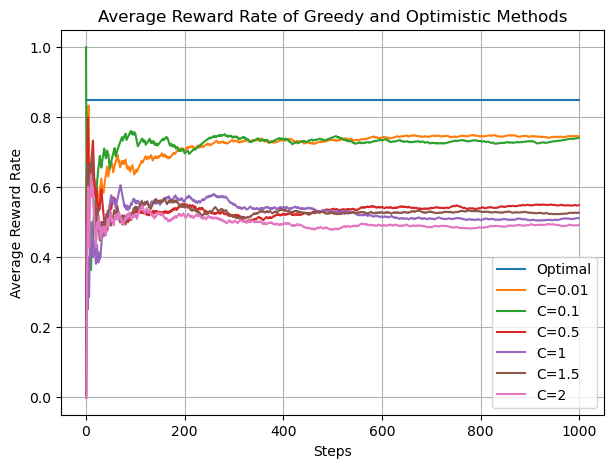

In [40]:
c = [0.01, 0.1, 0.5, 1, 1.5, 2]
plt.figure(figsize=(7, 5))
plt.plot([0, n_iter], [max(Bandit_prob), max(Bandit_prob)], label='Optimal')
    
for i in c:
    reward_rate_UDP = experiment_UCB(n_iter=n_iter, c=i)
    plt.plot(reward_rate_UDP, label='C=' + str(i))
    plt.xlabel('Steps')
    plt.ylabel('Average Reward Rate')
    plt.title('Average Reward Rate of Greedy and Optimistic Methods')
    plt.grid(True)
    plt.legend()
plt.show()

[0.13333333333333336, 0.5111111111111113, 0.7635467980295566, 0.5106382978723403, 0.8440000000000002, 0.07692307692307693, 0.4374999999999999, 0.4411764705882352, 0.5555555555555554, 0.5614035087719297]


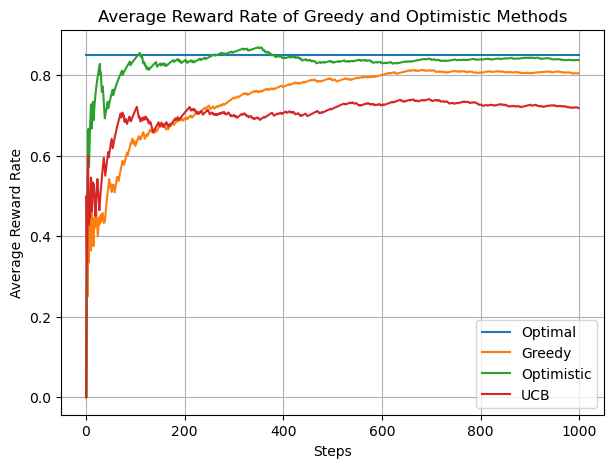

In [41]:
n_iter = 1000
reward_rate_greedy = experiment(n_iter=n_iter, Eps=0.1)
reward_rate_optimistic = experiment(n_iter=n_iter, initial_estimate=5, Eps=0.01)
reward_rate_UDP = experiment_UCB(n_iter=n_iter, c=0.1)

plt.figure(figsize=(7, 5))
plt.plot([0, n_iter], [max(Bandit_prob), max(Bandit_prob)], label='Optimal')
plt.plot(reward_rate_greedy, label='Greedy')
plt.plot(reward_rate_optimistic, label='Optimistic')
plt.plot(reward_rate_UDP, label='UCB')
plt.xlabel('Steps')
plt.ylabel('Average Reward Rate')
plt.title('Average Reward Rate of Greedy and Optimistic Methods')
plt.grid(True)
plt.legend()
plt.show()